In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

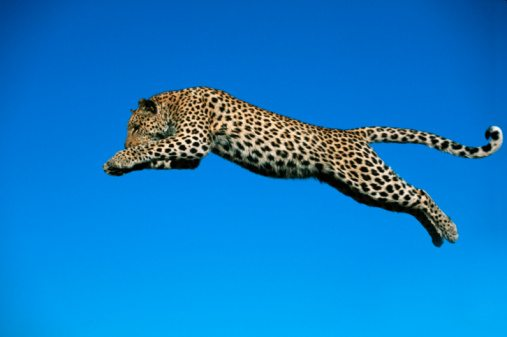

In [4]:
PATH = 'C://Users//getud//Git/data-question-6-leopards/'
Image(filename = PATH + "leopard-facts-6.jpg", width=1500, height=100)

# Detecting Outliers throgh EDA

In [5]:
import os

In [6]:
os.chdir('C://Users//getud//Git/data-question-6-leopards/')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime 

In [8]:
% matplotlib inline

# Reading Files 

In [9]:
events=pd.read_csv("data/Extranet2.ExactFuelEvents.csv")

In [10]:
df_events=events[['Id', 'EventTimeStamp', 'EquipmentID','DriverID', 'Speed',  'Odometer', 'IgnitionStatus']]

In [11]:
df_events.head()

,Id,EventTimeStamp,EquipmentID,DriverID,Speed,Odometer,IgnitionStatus
0,12649083,2017-01-01 00:00:32.387,1992,BATK,0,39895.5,2
1,12649084,2017-01-01 00:01:24.867,1712,TAYANT,0,360378.8,1
2,12649092,2017-01-01 00:04:15.053,1713,RUSR,67,377577.4,1
3,12649102,2017-01-01 00:04:10.260,1585,MCAD,0,513931.8,1
4,12649103,2017-01-01 00:10:13.187,1564,ULAL,3,498691.0,1


In [12]:
tank_levels=pd.read_csv("data/Extranet2.ExactFuelTankLevels.csv")

In [13]:
df_levels=tank_levels[['TankId', 'TankLevelPercent', 'TankLevelGallons',
       'ExactFuelEventId']]

In [14]:
fuel_vendor=pd.read_csv("data/BGETCHDATA.PTCHTRANH.csv")

In [15]:
df_fuel_transaction=fuel_vendor[['TRNID', 'TRNDAT', 'TRNTIM', 'TRNDRI', 'TRNUNT', 'TRNPI1', 'TRNPQ1' ]]

In [16]:
df_transaction = df_fuel_transaction[~df_fuel_transaction['TRNPI1'].isin(['SCLE', 'CADV', 'DEFD', 'ADD ', 'OIL ', 'UREA', 'DEFC'])] 

In [17]:
df_transaction.head()

,TRNID,TRNDAT,TRNTIM,TRNDRI,TRNUNT,TRNPI1,TRNPQ1
1,42575331,20170101,48,MANRI,1584,ULSD,137.40
2,42578678,20170101,134,RUSR,1713,ULSD,137.93
3,42578722,20170101,137,FOSJA,1711,ULSD,45.00
4,42579695,20170101,302,HICWIL,1837,ULSD,107.36
5,42579752,20170101,307,BATK,1992,ULSD,93.88


In [18]:
#confirm no junk data in this col (returns false if no NaNs)
None in df_transaction.TRNTIM

# 20170112 3

#Combine tr_date and tr_time into a single date time column
    #1. zero pad tr_time on left for interpretation as military time
        #cast tr_time as string
df_transaction.TRNTIM = df_transaction.TRNTIM.astype(str)

# 20170112 '3' Time column is now a string
#ensure none of my strings are over 4 digits in length
for s in df_transaction.TRNTIM:
    assert len(s) < 5

#check for blanks
'' in df_transaction.TRNTIM

#add zeros to the left until each cell is len 4
zero_padded_time = []
for s in df_transaction.TRNTIM:
    while len(s) < 4:
        s = '0' + s
    zero_padded_time.append(s)
# 20170112 '0003' zero padded minutes
#spot check
for s in zero_padded_time:
    assert len(s) == 4

df_transaction.TRNTIM = zero_padded_time

#append tr_date (as string) and tr_time together, and then convert them to dateime
#transaction_df.tr_datetime 
tst = [datetime.strptime(str(d) + 
                         t, '%Y%m%d%H%M') 
       for d, t in zip(df_transaction.TRNDAT,
                       df_transaction.TRNTIM)]
#love list comprehensions

df_transaction['tr_datetime'] = tst#assign

#drop superfluous columns
#df_transaction.drop(['tr_date','tr_time'], axis = 'columns', inplace=True)
df_transaction.head()

#2017-01-010048' does not match format '%Y%m%d%H%M'

df_transaction.drop(["TRNDAT", "TRNTIM"], axis = 'columns', inplace=True)

C:\Users\getud\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\getud\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\getud\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
df_transaction['TRNUNT']=pd.to_numeric(df_transaction['TRNUNT'],errors='coerce')

C:\Users\getud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_transaction.isnull().sum()

TRNID           0
TRNDRI          0
TRNUNT         85
TRNPI1          0
TRNPQ1          0
tr_datetime     0
dtype: int64

In [21]:
df_transaction.dropna(axis=0,inplace=True)

C:\Users\getud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_transaction['TRNUNT'] = df_transaction['TRNUNT'].astype(int)

C:\Users\getud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_transaction['TRNUNT'].dtypes

dtype('int32')

In [24]:
#df_transaction.head()

In [25]:
df_event_level = pd.merge(df_events, df_levels, how='inner', left_on='Id', right_on = 'ExactFuelEventId')

MemoryError: cannot allocate memory for array

In [ ]:
df_event_level["EventTimeStamp_str"]=df_event_level["EventTimeStamp"].str.split(".", expand=True).get(0)

In [ ]:
# drop irrelevant variables from both data frames 

In [ ]:
df_event_level.sort_values(["EquipmentID","DriverID"], inplace=True)

In [ ]:
#df_event_level.head()

In [ ]:
df_event_level.drop(["EventTimeStamp","Id"],axis=1,inplace=True)

In [ ]:
df_event_level["EventTimeStamp_str"]=pd.to_datetime(df_event_level["EventTimeStamp_str"])

In [ ]:
df_event_level.set_index("EventTimeStamp_str", inplace=True)

In [ ]:
len(df_event_level[df_event_level["EquipmentID"]==1997])

In [ ]:
df_transaction.sort_values(["TRNUNT","TRNDRI"], inplace=True)

In [ ]:
#df_transaction.head()

In [ ]:
df_transaction=df_transaction[["TRNID","TRNDRI","TRNUNT","TRNPQ1","tr_datetime"]]

In [ ]:
df_transaction.set_index('tr_datetime', inplace=True)

In [ ]:
#df_transaction["TRNUNT"].unique()

# Subsetting Data Frames

In [ ]:
df_transaction_1997=df_transaction[df_transaction['TRNUNT']==1997]

In [ ]:
df_EL_1997=df_event_level[df_event_level['EquipmentID']==1997]

In [ ]:
df_EL_2018=df_event_level[df_event_level['EquipmentID']==2018]

In [ ]:
df_EL_2018.shape

In [ ]:
df_EL_2018['DriverID'].unique()

In [ ]:
df_1997_merged=pd.merge(df_transaction_1997,df_EL_1997, how='left', left_on='TRNUNT', right_on='EquipmentID')

In [ ]:
df_1997_merged.shape

In [ ]:
df_EL_1997.info()

In [ ]:
df_transaction.info()

In [ ]:
#df_EL_1997.set_index("EventTimeStamp_str", inplace=True)

In [ ]:
#df_transaction_1997.set_index('tr_datetime', inplace=True)

In [ ]:
df_EL_1997['DriverID'].unique()

In [ ]:
df_EL_1997=df_EL_1997[df_EL_1997['DriverID'].isin(['PLAJ'])]

In [ ]:
#df_EL_1997.groupby('DriverID')["Odometer"].subtract()

In [ ]:
#df_EL_1997.subtract("Odometer", axis='rows', errors=coerce)

# Data Transformation

In [ ]:
df_EL_1997['Odometer_diff'] = abs(df_EL_1997['Odometer']- df_EL_1997['Odometer'].shift(1))

In [ ]:
df_EL_1997['Tanklevel_diff'] = df_EL_1997['TankLevelGallons'].shift(1)-df_EL_1997['TankLevelGallons']

In [ ]:
df_EL_1997['MPG']=abs(df_EL_1997['Odometer_diff']/df_EL_1997['Tanklevel_diff'])

In [ ]:
df_EL_1997[["EquipmentID","Speed","Odometer","Odometer_diff","Tanklevel_diff","MPG" ]].describe()

#  Odometer reading of  a Clean Driver 

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df_EL_1997.groupby(['DriverID'])['Odometer'].plot(ax=ax)
df_EL_1997.groupby(['DriverID'])['Odometer_diff'].plot(ax=ax)
df_EL_1997.groupby(['DriverID'])['MPG'].plot(ax=ax)
plt.xlabel("Event Time Stamp")
plt.ylabel("Odometer")

# What?

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
#df_EL_1997.groupby(['DriverID'])['Odometer'].plot(ax=ax)
df_EL_1997.groupby(['DriverID'])['Odometer_diff'].plot(ax=ax)
df_EL_1997.groupby(['DriverID'])['MPG'].plot(ax=ax)
plt.xlabel("Event Time Stamp")
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

sns.boxplot(data=df_EL_1997['MPG'])
plt.ylabel("Mile Per Gallon")

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot("MPG", data=df_EL_1997.loc["2017-01-03 02:54:49":"2018-03-23 08:38:53"])
plt.ylabel("Mile Per Gallon")
plt.xlabel("Event Time Stamp")

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.hist("TRNPQ1", data=df_transaction_1997)
plt.ylabel(" Fuel amount per Transaction(Gallons)")
plt.xlabel("Event Time Stamp")

In [ ]:
df_EL_2018=df_EL_2018[df_EL_2018['DriverID'].isin(['HUCJ'])]


In [ ]:
#df_EL_2018=df_event_level[df_event_level['EquipmentID']==2018]

In [ ]:
df_EL_2018['Odometer_diff'] = df_EL_2018['Odometer']- df_EL_2018['Odometer'].shift(1)

In [ ]:
df_EL_2018['Tanklevel_diff'] = df_EL_2018['TankLevelGallons'].shift(1)-df_EL_2018['TankLevelGallons']

In [ ]:
df_EL_2018['MPG']=abs(df_EL_2018['Odometer_diff']/df_EL_2018['Tanklevel_diff'])

In [ ]:
df_EL_2018[["EquipmentID","Speed","Odometer","Odometer_diff","Tanklevel_diff","MPG" ]].describe()

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df_EL_2018.groupby(['DriverID'])['Odometer'].plot(ax=ax)
df_EL_2018.groupby(['DriverID'])['Odometer_diff'].plot(ax=ax)
df_EL_2018.groupby(['DriverID'])['MPG'].plot(ax=ax)
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
#df_EL_2018.groupby(['DriverID'])['Odometer'].plot(ax=ax)
df_EL_2018['Odometer_diff'].plot(ax=ax)
df_EL_2018['MPG'].plot(ax=ax)
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

sns.boxplot(data=df_EL_2018['Odometer_diff'])
plt.ylabel("Odometer Difference")
plt.title("Box plot of Odometer Difference" )

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

sns.boxplot(data=df_EL_2018['MPG'])
plt.ylabel("Mile Per Gallon")
plt.title("Box plot of Mile Per Gallon" )

In [ ]:
#df_event_level["EquipmentID"].unique()

In [ ]:
df_EL_1802=df_event_level[df_event_level['EquipmentID']==1802]

In [ ]:
df_EL_1802['DriverID'].unique()

In [ ]:
df_EL_1802.dropna(subset=['DriverID'], inplace=True)

In [ ]:
#df_EL_1802.groupby('DriverID')['Odometer'].diff(periods=1)

In [ ]:
df_EL_1802['Odometer_diff'] = df_EL_1802.groupby('DriverID')['Odometer'].diff(periods=1)
df_EL_1802['Tanklevel_diff'] = df_EL_1802.groupby('DriverID')['TankLevelGallons'].diff(periods=1)

df_EL_1802['MPG']=abs(df_EL_1802['Odometer_diff']/df_EL_1802['Tanklevel_diff'])

In [ ]:
df_EL_1802[["EquipmentID","Speed","Odometer","Odometer_diff","Tanklevel_diff","MPG" ]].describe()

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

sns.boxplot(data=df_EL_1802['MPG'])
plt.ylabel("Mile Per Gallon")
plt.title("Box plot of Mile Per Gallon" )

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
#df_EL_2018.groupby(['DriverID'])['Odometer'].plot(ax=ax)
df_EL_1802['Odometer_diff'].plot(ax=ax)
df_EL_1802['MPG'].plot(ax=ax)
plt.title("Variation in Odometer Difference and MPG" )
plt.legend()